# Assignment 2 2AMM10 2023-2024

## Group: [Fill in your group name]
### Member 1: [Fill in your name]
### Member 2: [Fill in your name]
### Member 3: [Fill in your name]

We need to install some specific libraries. The cell below installs torch_geometric for torch 2.6.0+cu124. In case the current version of torch is different, check [here](https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html) to see which versions (of both libraries) you should install. You might also need to install an old version of torch from [here](https://pytorch.org/get-started/previous-versions/)

**Note:** Do not install pyg_lib from the optional dependencies

https://deepchem.readthedocs.io/en/2.4.0/get_started/installation.html

Philippe Schwaller, Teodoro Laino, Théophile Gaudin, Peter Bolgar, Christopher A. Hunter, Costas Bekas, and Alpha A. Lee ACS Central Science 2019 5 (9): Molecular Transformer: A Model for Uncertainty-Calibrated Chemical Reaction Prediction 1572-1583 DOI: 10.1021/acscentsci.9b00576

In [ ]:
# !pip show torch

In [ ]:
# !pip install rdkit
# !pip install torch_geometric
# !pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

In [6]:
import pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import matplotlib.pyplot as plt

In [9]:
with open('data/pos_data.pkl', 'rb') as f:
    pos_data = pickle.load(f)

with open('data/type_data.pkl', 'rb') as f:
    type_data = pickle.load(f)

with open('data/smiles.pkl', 'rb') as f:
    smiles_data = pickle.load(f)

data_split = np.load('data/data_split.npz')

train_idxes = data_split['train_idx']
test_idxes = data_split['test_idx']

formation_energy = np.load('data/formation_energy.npz')

fe = formation_energy['y'] # normalized formation energy
mu = formation_energy['mu']
std = formation_energy['sigma']

In [19]:
# shapes of lists
print("Length of data")
print(f"pos_data: {len(pos_data)}, type_data: {len(type_data)}, smiles: {len(smiles_data)}")
print("Idxes")
print(f"train: {len(train_idxes)}, test: {len(test_idxes)}, sum: {len(train_idxes) + len(test_idxes)}")

Length of data
pos_data: 129012, type_data: 129012, smiles: 129012
Idxes
train: 119012, test: 10000, sum: 129012


In [20]:
def at_number_to_atom_name(at_number):
    if at_number == 6:
        return 'C'
    elif at_number == 1:
        return 'H'
    elif at_number == 7:
        return 'N'
    elif at_number == 8:
        return 'O'
    elif at_number == 9:
        return 'F'
    elif at_number == 16:
        return 'S'
    else:
        return 'Unknown'

def inspect_structure(idx):
    smile = smiles_data[idx]
    pos = pos_data[idx]
    typ = type_data[idx]

    header = f"{'Atom':^5}│{'Number':^6}│{'x':^10}│{'y':^10}│{'z':^10}"
    line   = "─────┼──────┼──────────┼──────────┼──────────"
    print(header)
    print(line)

    for atom_num, (x, y, z) in zip(typ, pos):
        atom_sym = at_number_to_atom_name(atom_num)
        print(f"{atom_sym:^5}│{atom_num:^6}│{x:>10.3f}│{y:>10.3f}│{z:>10.3f}")
    print("")
    print("")
    print(f'SMILE: {smile}')
    print("")
    print("")
    print(f'Formation Energy: {fe[idx]*std + mu:.3f}')
    print(f'Formation Energy (normalized): {fe[idx]:.5f}')
    mol = Chem.MolFromSmiles(smile)
    if mol:
        # RDKit prefers 2‑D coordinates for nice depictions
        Chem.AllChem.Compute2DCoords(mol)
        img = Draw.MolToImage(mol, size=(300, 300))

        # Display with matplotlib (works both in notebooks and scripts)
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(img)
        plt.show()

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  C  │  6   │    -0.013│     1.086│     0.008
  H  │  1   │     0.002│    -0.006│     0.002
  H  │  1   │     1.012│     1.464│     0.000
  H  │  1   │    -0.541│     1.447│    -0.877
  H  │  1   │    -0.524│     1.438│     0.906


SMILE: C


Formation Energy: -17.172
Formation Energy (normalized): 5.72327


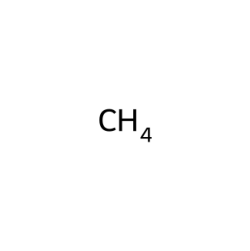

In [21]:
# methane
# Note how methane has a relatively high formation energy (compared to QM9)
# This correlates with lower thermodynamic stability and higher reactivity
# For example, methane readily burns in oxygen (CH₄ + 2O₂ → CO₂ + 2H₂O)
inspect_structure(0)

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  N  │  7   │     0.012│     1.183│    -0.103
  C  │  6   │    -0.029│    -0.060│     0.032
  O  │  8   │     1.011│    -0.987│     0.195
  C  │  6   │     0.052│    -2.066│     0.020
  C  │  6   │    -0.945│    -2.090│     1.114
  C  │  6   │    -1.117│    -1.089│    -0.029
  C  │  6   │    -1.932│    -1.484│    -1.238
  O  │  8   │    -1.441│    -2.793│    -1.598
  C  │  6   │    -0.059│    -2.896│    -1.232
  H  │  1   │     0.972│     1.531│    -0.068
  H  │  1   │    -1.655│    -2.911│     1.102
  H  │  1   │    -0.658│    -1.728│     2.094
  H  │  1   │    -3.006│    -1.596│    -1.067
  H  │  1   │    -1.775│    -0.757│    -2.046
  H  │  1   │     0.612│    -2.475│    -1.995
  H  │  1   │     0.155│    -3.962│    -1.115


SMILE: [NH-][C@@H]1O[C@]23COC[C@]12C3


Formation Energy: -69.198
Formation Energy (normalized): 0.67754


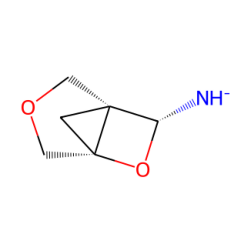

In [22]:
# random structure
inspect_structure(np.random.choice(range(len(smiles_data))))

## Exploring SMILES data:

In [24]:
len(smiles_data)

129012

In [17]:
import re

def get_unique_tokens(smiles_list):
    """
    Given a list of SMILES strings, tokenizes each string using the provided regex pattern
    and returns the set of unique tokens found across the entire list.
    """
    # Regex pattern for SMILES tokenization
    pattern = re.compile(
        r"(\%\d\d|Cl|Br|\[.*?\]|"    # two-digit ring closures, halogens, bracketed atoms
        r"@@?|"                       # '@' or '@@' (chirality)
        r"[A-Za-z]|\d|=|#|\/|\\|\(|\)|\.|:)"
    )
    
    all_tokens = []
    for smi in smiles_list:
        tokens = pattern.findall(smi)
        all_tokens.extend(tokens)
        
    unique_tokens = set(all_tokens)
    return unique_tokens

# Example usage:
# Replace this example list with your own data
smiles_list = [
    "CC(=O)O[NH4+]",
    "ClCCl",
    "C1=CC=CC=C1",
    "[Fe+2]CCO",
    "C[C@H](N)C(=O)O"
]

unique_tokens = get_unique_tokens(smiles_data)
print(f"Number of unique tokens: {len(unique_tokens)}")
print("Unique tokens:")
print(unique_tokens)


Number of unique tokens: 38
Unique tokens:
{'[CH-]', '/', '[N+]', 'c', '[C@]', '2', '(', 'O', '[cH+]', ')', '[C@@H]', '[NH2+]', '5', '#', 'o', '3', '[N@H+]', '[H]', '[C@H]', '1', '[nH]', 'C', '[N@@H+]', '=', '[NH-]', '4', '[cH-]', '[NH+]', 'n', '[C@@]', '[nH+]', 'F', '[CH+]', '[NH3+]', '[O-]', '\\', 'N', '[n+]'}


In [30]:
# So there seem to be a lot of tokens, or molecules which exist to be missing. Let's check if this is really the case.

for i in range(len(smiles_data)):
    mol = smiles_data[i]
    if "P" in mol or "p" in mol:
        print(f"Found P in {mol} at index {i}")
    if "Br" in mol or "B" in mol:
        print(f"Found Br or B in {mol} at index {i}")

In [31]:
# RESEARCH CELL: checking how many unique contents are in the square brackets --> used to reason that it is a good idea to use the square brackets as tokens
# and not to tokenize the characters inside the brackets. --> Reasons for this should also be in the papers from chatgpt chat.

pattern = re.compile(r'\[([^\]]+)\]')

all_contents = []
for s in smiles_data:
    # .findall() returns a list of the inner group (i.e. without the brackets)
    all_contents.extend(pattern.findall(s))

unique_contents = set(all_contents)

# print("All bracket‐contents:", all_contents)
print("Unique contents:", unique_contents)
print("Number of unique contents:", len(unique_contents))

Unique contents: {'n+', 'C@H', 'nH+', 'N@H+', 'C@@H', 'C@@', 'N@@H+', 'NH-', 'CH-', 'cH+', 'nH', 'NH+', 'NH3+', 'N+', 'C@', 'CH+', 'NH2+', 'H', 'cH-', 'O-'}
Number of unique contents: 20


## Tokenization and encoding - SMILES

In [44]:
import re
import torch
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch import nn


# A very common regex pattern for SMILES‐tokenization
pattern = (
    r"(\%\d\d|Cl|Br|\[.*?\]|"         # two‐digit ring closures, halogens, bracketed atoms
    r"@@?|"                           # '@' or '@@' (chirality)
    r"[A-Za-z]|\d|=|#|\/|\\|\(|\)|\.|:)"
)


def tokenize_smiles(smi):
    """Tokenize single SMILES string into tokens."""
    tokens = re.findall(pattern, smi)
    return tokens


def tokenize_data(smiles_data):
    """Tokenize the dataset of SMILES strings."""
    tokenized_data = []
    for smi in smiles_data:
        tokens = tokenize_smiles(smi)
        tokenized_data.append(tokens)
    return tokenized_data


tokenized_smiles_data = tokenize_data(smiles_data)


# Create vocabulary from the tokenized data

vocab = sorted({tok for seq in tokenized_smiles_data for tok in seq})
token2idx = {tok: idx + 1 for idx, tok in enumerate(vocab)}  # the +1 is to reserve index 0 for padding
idx2token = {idx: tok for tok, idx in token2idx.items()}
vocab_size = len(vocab) + 1  # +1 because token index 0 is reserved for padding


# Integer encoding of tokenized data
def encode_tokens(tokenized_data, token2idx, vocab_size, one_hot_encoding=False, encoding_padding=True):
    """Convert tokenized data into integer indices."""
    assert not (one_hot_encoding and not encoding_padding), "one_hot_encoding=True requires do_padding=True."
    encoded_data = []

    for tokens in tokenized_data:
        encoded_seq = [token2idx.get(tok, 0) for tok in tokens]  # 0 is the index for padding
        encoded_data.append(torch.tensor(encoded_seq, dtype=torch.long))  # long tensor because we work with integers now
    
    if encoding_padding:  # Pad sequences to the same length
        encoded_data = pad_sequence(encoded_data, batch_first=True, padding_value=0)

    if one_hot_encoding:  # Convert to one-hot encoding
        encoded_data = F.one_hot(encoded_data, num_classes=vocab_size)
    
    # NOTE: It might be valuable to add an embedding layer to the RNN  --> this is just a single layer, no need to actually do token embedding ourselves
    # NOTE: Long tensor itself should not be thrown into the RNN, but rather the embeddings converts it to embedding normal tensor.

    return encoded_data


# https://chatgpt.com/share/683ed631-19b8-8013-a84e-2d30b4dcca35 --> at the end some papers are cited for this approach, but still need to check
# whether this is actually correct.

# Reason for using the things between [] as tokens is that they follow specific charge rules. 
# Altough the RNN can learn the common charged atom combinations which occur in the dataset, 
# it will likely not be able to generalize and create new valid charged atoms. Therefore, better
# to use the ones we have seen as tokens. This makes the RNN more robust to create valid molecules given existing elements.
# Also in slides: special atoms (“[…]”) --> so can be seen as a single token. 


encode_tokens(tokenized_smiles_data, token2idx, vocab_size, one_hot_encoding=True, encoding_padding=True)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

## Task 1

## Task 2

## Task 3

In [ ]:
def is_valid_smiles(smiles):
    if smiles is None:
        return False
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def canonicalize(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        return 'None'
    except:
        return 'None'

In [ ]:
canonicalize("COO"), canonicalize("O(C)O")

In [ ]:
is_valid_smiles("COO"), is_valid_smiles("O(C)O"), is_valid_smiles("C##")